In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from matplotlib.colors import rgb2hex
import matplotlib.cm as cm


import matplotlib.colors 
from collections import Counter
cmap2 = cm.get_cmap('twilight',13)
colors1= []
for i in range(cmap2.N):
    rgb= cmap2(i)[:4]
    colors1.append(rgb2hex(rgb))

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Set style
sns.set(style='whitegrid')

In [5]:
df = pd.read_csv('pokemon.csv')

In [6]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [8]:
df.info()
# describes dataset
# object is categorical variable 
# int64 is numerical variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [10]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [12]:
# unique value counts
for i in list(df.columns):
    print("{} has unique value counts equal to {}".format(i, df[i].value_counts().shape[0]))

# has unique value counts equal to 721
Name has unique value counts equal to 800
Type 1 has unique value counts equal to 18
Type 2 has unique value counts equal to 18
Total has unique value counts equal to 200
HP has unique value counts equal to 94
Attack has unique value counts equal to 111
Defense has unique value counts equal to 103
Sp. Atk has unique value counts equal to 105
Sp. Def has unique value counts equal to 92
Speed has unique value counts equal to 108
Generation has unique value counts equal to 6
Legendary has unique value counts equal to 2


## Analysis of pokemons by Type

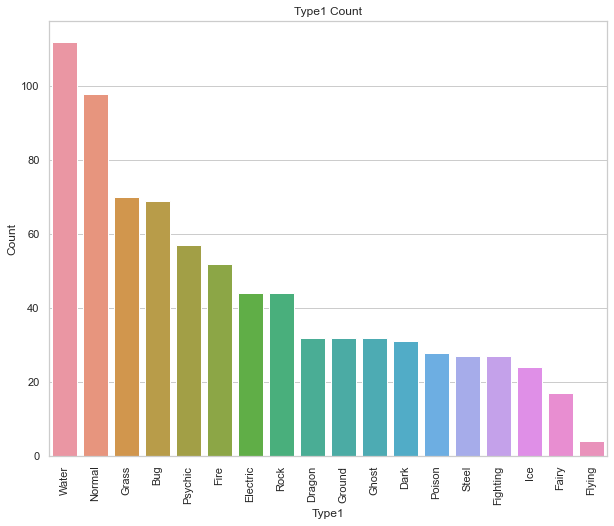

In [24]:
plt.figure(figsize=(10,8))
sns.countplot(x='Type 1',data=df,order = df['Type 1'].value_counts().index)
plt.xlabel('Type1')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('Type1 Count')


plt.show()

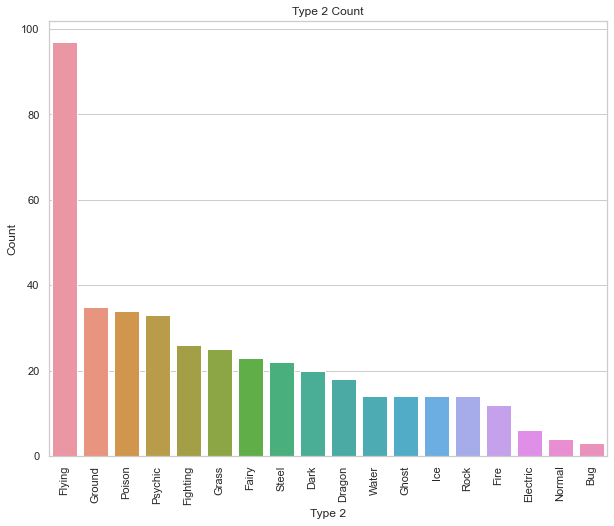

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(x='Type 2',data=df,order = df['Type 2'].value_counts().index)
plt.xlabel('Type 2')
plt.xticks(rotation = 90)
plt.ylabel('Count')
plt.title('Type 2 Count')


plt.show()

## Correlation 

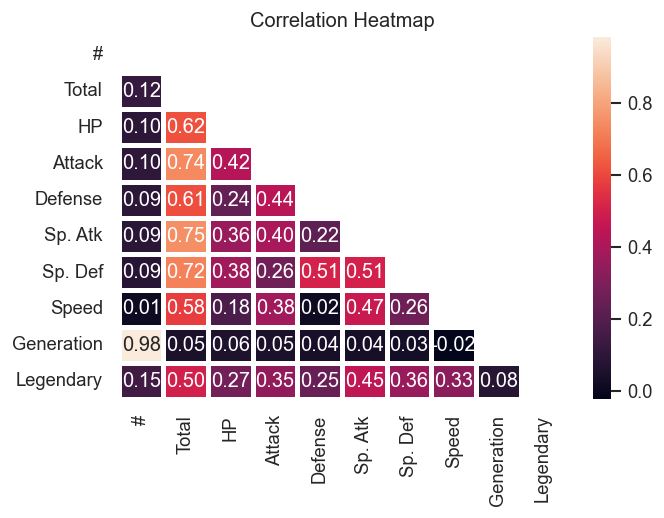

In [36]:
plt.figure(dpi = 120)
toMask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(), mask = toMask , fmt = ".2f",annot=True,lw=2)

plt.title('Correlation Heatmap')

plt.show()

In [44]:
# Total Attack

df_a = df.sort_values(by='Attack',ascending=False)[:10][['Name','Attack']]
df_a

,Name,Attack
163,MewtwoMega Mewtwo X,190
232,HeracrossMega Heracross,185
424,GroudonPrimal Groudon,180
426,RayquazaMega Rayquaza,180
429,DeoxysAttack Forme,180
711,KyuremBlack Kyurem,170
494,GarchompMega Garchomp,170
527,GalladeMega Gallade,165
387,BanetteMega Banette,165
454,Rampardos,165


In [45]:
df_d = df.sort_values(by = 'Defense', ascending = False)[:10][['Name', 'Defense']]
df_d

,Name,Defense
230,Shuckle,230
224,SteelixMega Steelix,230
333,AggronMega Aggron,230
223,Steelix,200
414,Regirock,200
789,Avalugg,184
98,Cloyster,180
87,SlowbroMega Slowbro,180
332,Aggron,180
456,Bastiodon,168


In [46]:
## inka linear regression krdo

<Figure size 360x360 with 0 Axes>

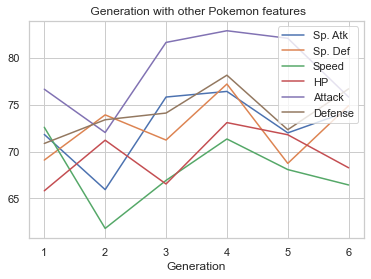

In [54]:
pg = df.groupby('Generation').mean()[['Sp. Atk', 'Sp. Def', 'Speed','HP', 'Attack', 'Defense' ]]

# Generation with other Pokemon features

plt.figure(figsize=(5,5))
pg.plot.line()
plt.title(' Generation with other Pokemon features')
plt.legend(loc='upper right')

plt.show()

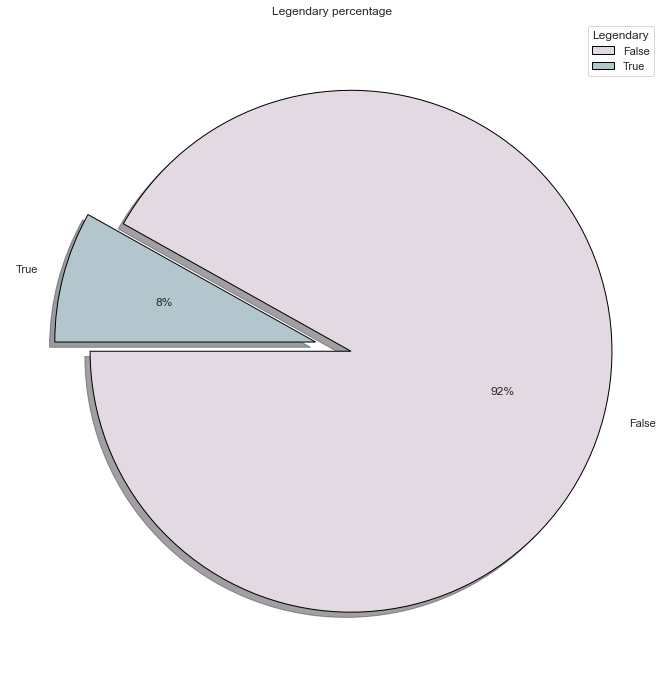

In [51]:
#   Legendary Percentage

plt.figure(figsize=(25,12))
p_r = df['Legendary'].value_counts().head(10)
plt.pie(x=p_r,labels=p_r.index,colors=colors1,autopct='%.0f%%',explode=[0.07 for i in p_r.index],startangle=180,wedgeprops={'linewidth':1,'edgecolor':'black'},shadow=True)
plt.title('Legendary percentage ')
plt.legend(loc='upper right',title='Legendary')


plt.show()